In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import os
import numpy as np
import tensorflow as tf
import random
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img, img_to_array
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

In [ ]:
# Define dataset paths
train_dir = "/content/drive/MyDrive/ml_project_updated/train_set/"
test_dir = "/content/drive/MyDrive/ml_project_updated/test_set/"

# Image Data Generator with augmentation
data_gen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    validation_split=0.2  # 20% validation data
)

# Load train and validation datasets
train_data = data_gen.flow_from_directory(
    train_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='categorical',
    subset='training'
)

val_data = data_gen.flow_from_directory(
    train_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='categorical',
    subset='validation'
)

# Get class labels
class_names = list(train_data.class_indices.keys())
print("Classes:", class_names)


Found 423 images belonging to 6 classes.
Found 105 images belonging to 6 classes.
Classes: ['FU-athlete-foot', 'FU-hand-ringworm', 'FU-jock-itch', 'FU-nail-fungus', 'FU-ringworm', 'FU-scalp-ringworm']


In [ ]:
# Define CNN model
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)),
    MaxPooling2D(2, 2),

    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),

    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),

    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(len(class_names), activation='softmax')  # Output layer with 'n' classes
])

# Compile model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Show model summary
model.summary()


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_6 (Conv2D)                    │ (None, 148, 148, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_6 (MaxPooling2D)       │ (None, 74, 74, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_7 (Conv2D)                    │ (None, 72, 72, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_7 (MaxPooling2D)       │ (None, 36, 36, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_8 (Conv2D)                    │ (None, 34, 34, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_8 (MaxPooling2D)       │ (None, 17, 17, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_2 (Flatten)                  │ (None, 36992)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_8 (Dense)                      │ (None, 128)                 │       4,735,104 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_4 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_9 (Dense)                      │ (None, 6)                   │             774 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 4,829,126 (18.42 MB)

 Trainable params: 4,829,126 (18.42 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# Train the model
history = model.fit(
    train_data,
    validation_data=val_data,
    epochs=10
)

# Save the model
model.save('/content/drive/MyDrive/ml_project_updated/model.h5')
print("Model saved successfully!")

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10
14/14 ━━━━━━━━━━━━━━━━━━━━ 29s 2s/step - accuracy: 0.1785 - loss: 2.0412 - val_accuracy: 0.2857 - val_loss: 1.7545
Epoch 2/10
14/14 ━━━━━━━━━━━━━━━━━━━━ 16s 1s/step - accuracy: 0.2087 - loss: 1.8033 - val_accuracy: 0.3333 - val_loss: 1.7582
Epoch 3/10
14/14 ━━━━━━━━━━━━━━━━━━━━ 15s 1s/step - accuracy: 0.2331 - loss: 1.7371 - val_accuracy: 0.3048 - val_loss: 1.5084
Epoch 4/10
14/14 ━━━━━━━━━━━━━━━━━━━━ 15s 1s/step - accuracy: 0.3072 - loss: 1.5827 - val_accuracy: 0.3905 - val_loss: 1.4793
Epoch 5/10
14/14 ━━━━━━━━━━━━━━━━━━━━ 15s 1s/step - accuracy: 0.3780 - loss: 1.4755 - val_accuracy: 0.4381 - val_loss: 1.4220
Epoch 6/10
14/14 ━━━━━━━━━━━━━━━━━━━━ 16s 1s/step - accuracy: 0.3669 - loss: 1.4906 - val_accuracy: 0.4190 - val_loss: 1.3830
Epoch 7/10
14/14 ━━━━━━━━━━━━━━━━━━━━ 15s 1s/step - accuracy: 0.3310 - loss: 1.6481 - val_accuracy: 0.4095 - val_loss: 1.5861
Epoch 8/10
14/14 ━━━━━━━━━━━━━━━━━━━━ 15s 1s/step - accuracy: 0.4533 - loss: 1.4854 - val_accuracy: 0.4381 - val_loss:

Model saved successfully!


In [1]:
# Load trained model
model = tf.keras.models.load_model('/content/drive/MyDrive/ml_project_updated/model.h5')

# Get all test image paths from subdirectories
all_test_images = []
for subdir in os.listdir(test_dir):
    subdir_path = os.path.join(test_dir, subdir)
    if os.path.isdir(subdir_path):
        for img_file in os.listdir(subdir_path):
            img_path = os.path.join(subdir_path, img_file)
            all_test_images.append(img_path)

# Check if images exist
if len(all_test_images) == 0:
    print("No test images found!")
else:
    # Select a random image
    test_image_path = random.choice(all_test_images)
    print("Testing image:", test_image_path)

    # Function to predict an image
    def predict_image(image_path, model, class_names):
        img = load_img(image_path, target_size=(150, 150))
        img_array = img_to_array(img) / 255.0
        img_array = np.expand_dims(img_array, axis=0)

        prediction = model.predict(img_array)
        predicted_class = class_names[np.argmax(prediction)]

        return predicted_class

    # Predict result
    result = predict_image(test_image_path, model, class_names)
    print(f"Predicted Infection Type: {result}")

    # Display image
    img = load_img(test_image_path)
    plt.imshow(img)
    plt.title(f"Predicted: {result}")
    plt.axis("off")
    plt.show()


NameError: name 'tf' is not defined

In [ ]:
# optimization for better accuracy using SDD along with CNN

In [ ]:
import tensorflow as tf
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Dropout

# Load Pretrained MobileNetV2 (Feature Extractor)
base_model = MobileNetV2(input_shape=(150, 150, 3), include_top=False, weights='imagenet')
base_model.trainable = False  # Freeze base model layers

# SSD-inspired Classification Model
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(256, activation='relu')(x)
x = Dropout(0.4)(x)
# Changed line below: Assigned the output of the Dense layer to 'predictions'
predictions = Dense(len(class_names), activation='softmax')(x)  # Output layer

# Create Model
# Changed line below: Used 'predictions' as the output of the model
model = Model(inputs=base_model.input, outputs=predictions)

# Compile Model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Model Summary
model.summary()

# Train Model
history = model.fit(train_data, validation_data=val_data, epochs=10)

# Save Model
model.save('/content/drive/MyDrive/ml_project_updated/model_ssd.h5')
print("Model saved successfully!")

<ipython-input-50-d1fa2be6d107>:7: UserWarning: `input_shape` is undefined or non-square, or `rows` is not in [96, 128, 160, 192, 224]. Weights for input shape (224, 224) will be loaded as the default.
  base_model = MobileNetV2(input_shape=(150, 150, 3), include_top=False, weights='imagenet')


Model: "functional_174"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer_5             │ (None, 150, 150, 3)    │              0 │ -                      │
│ (InputLayer)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ Conv1 (Conv2D)            │ (None, 75, 75, 32)     │            864 │ input_layer_5[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ bn_Conv1                  │ (None, 75, 75, 32)     │            128 │ Conv1[0][0]            │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ Conv1_relu (ReLU)         │ (None, 75, 75, 32)     │              0 │ bn_Conv1[0][0]         │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ expanded_conv_depthwise   │ (None, 75, 75, 32)     │            288 │ Conv1_relu[0][0]       │
│ (DepthwiseConv2D)         │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ expanded_conv_depthwise_… │ (None, 75, 75, 32)     │            128 │ expanded_conv_depthwi… │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ expanded_conv_depthwise_… │ (None, 75, 75, 32)     │              0 │ expanded_conv_depthwi… │
│ (ReLU)                    │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ expanded_conv_project     │ (None, 75, 75, 16)     │            512 │ expanded_conv_depthwi… │
│ (Conv2D)                  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ expanded_conv_project_BN  │ (None, 75, 75, 16)     │             64 │ expanded_conv_project… │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block_1_expand (Conv2D)   │ (None, 75, 75, 96)     │          1,536 │ expanded_conv_project… │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block_1_expand_BN         │ (None, 75, 75, 96)     │            384 │ block_1_expand[0][0]   │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block_1_expand_relu       │ (None, 75, 75, 96)     │              0 │ block_1_expand_BN[0][… │
│ (ReLU)                    │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block_1_pad               │ (None, 77, 77, 96)     │              0 │ block_1_expand_relu[0… │
│ (ZeroPadding2D)           │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block_1_depthwise         │ (None, 38, 38, 96)     │            864 │ block_1_pad[0][0]      │
│ (DepthwiseConv2D)         │                        │                │                        │
├──────────────────────

 Total params: 2,587,462 (9.87 MB)

 Trainable params: 329,478 (1.26 MB)

 Non-trainable params: 2,257,984 (8.61 MB)

Epoch 1/10
14/14 ━━━━━━━━━━━━━━━━━━━━ 15s 749ms/step - accuracy: 0.3338 - loss: 2.1369 - val_accuracy: 0.6952 - val_loss: 0.8309
Epoch 2/10
14/14 ━━━━━━━━━━━━━━━━━━━━ 18s 598ms/step - accuracy: 0.7019 - loss: 0.8494 - val_accuracy: 0.7429 - val_loss: 0.7189
Epoch 3/10
14/14 ━━━━━━━━━━━━━━━━━━━━ 9s 608ms/step - accuracy: 0.7901 - loss: 0.6802 - val_accuracy: 0.8000 - val_loss: 0.5385
Epoch 4/10
14/14 ━━━━━━━━━━━━━━━━━━━━ 9s 620ms/step - accuracy: 0.7925 - loss: 0.5509 - val_accuracy: 0.8000 - val_loss: 0.5210
Epoch 5/10
14/14 ━━━━━━━━━━━━━━━━━━━━ 9s 539ms/step - accuracy: 0.8161 - loss: 0.5206 - val_accuracy: 0.8571 - val_loss: 0.4431
Epoch 6/10
14/14 ━━━━━━━━━━━━━━━━━━━━ 9s 603ms/step - accuracy: 0.8237 - loss: 0.4751 - val_accuracy: 0.8190 - val_loss: 0.5384
Epoch 7/10
14/14 ━━━━━━━━━━━━━━━━━━━━ 9s 611ms/step - accuracy: 0.8060 - loss: 0.4577 - val_accuracy: 0.8000 - val_loss: 0.5064
Epoch 8/10
14/14 ━━━━━━━━━━━━━━━━━━━━ 10s 574ms/step - accuracy: 0.8550 - loss: 0.3982 - val_accuracy:

Model saved successfully!


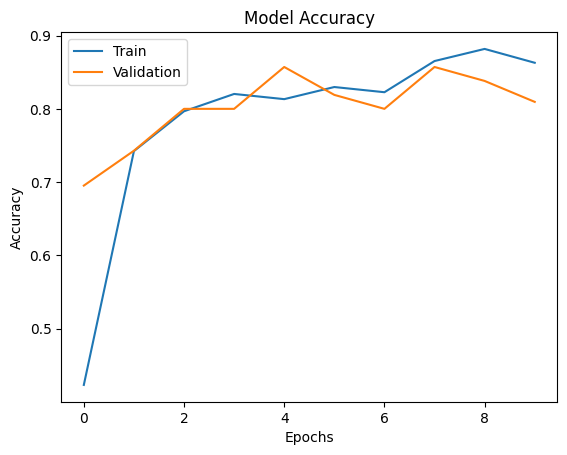

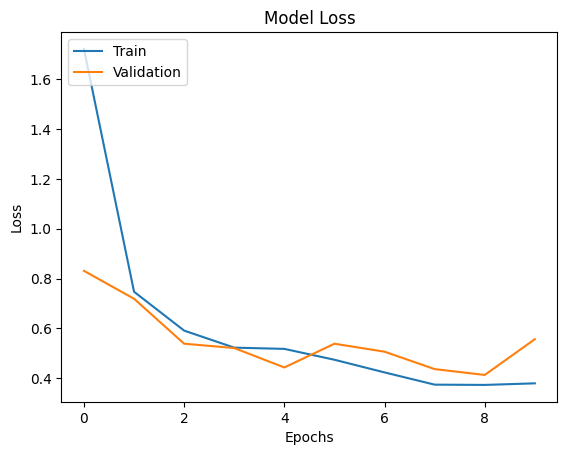

In [ ]:
import matplotlib.pyplot as plt

# Plot training & validation accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# Plot training & validation loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()


Found 134 images belonging to 6 classes.
5/5 ━━━━━━━━━━━━━━━━━━━━ 2s 280ms/step - accuracy: 0.9172 - loss: 0.3252

✅ Test Accuracy: 91.04%
5/5 ━━━━━━━━━━━━━━━━━━━━ 3s 503ms/step


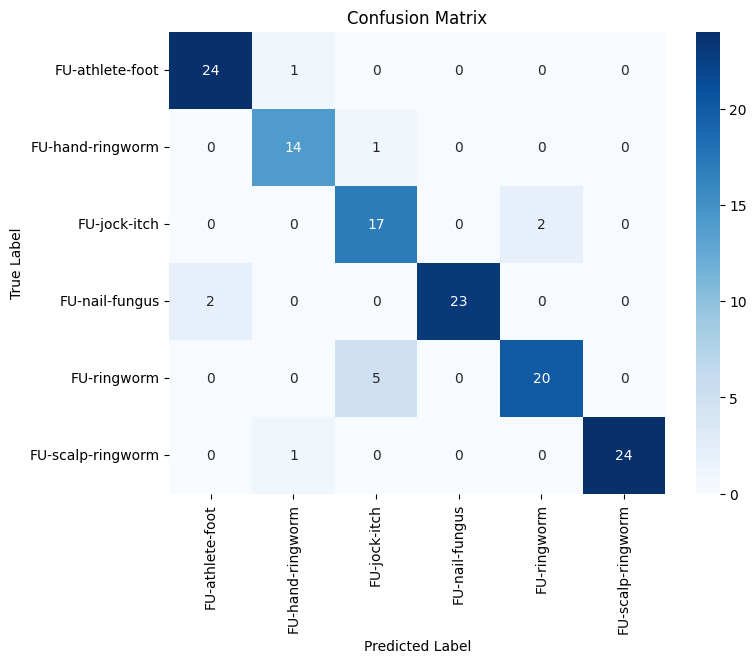


🔹 Classification Report:
                   precision    recall  f1-score   support

  FU-athlete-foot       0.92      0.96      0.94        25
 FU-hand-ringworm       0.88      0.93      0.90        15
     FU-jock-itch       0.74      0.89      0.81        19
   FU-nail-fungus       1.00      0.92      0.96        25
      FU-ringworm       0.91      0.80      0.85        25
FU-scalp-ringworm       1.00      0.96      0.98        25

         accuracy                           0.91       134
        macro avg       0.91      0.91      0.91       134
     weighted avg       0.92      0.91      0.91       134


🔹 Accuracy: 0.91


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

# Assuming your test data generator is defined as:
test_datagen = ImageDataGenerator(rescale=1./255)
test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(150, 150),  # Must match your model input size
    batch_size=32,
    class_mode='categorical',
    shuffle=False  # Don't shuffle so predictions align with labels
)

# 1️⃣ **Evaluate the Model**
test_loss, test_accuracy = model.evaluate(test_generator)
print(f"\n✅ Test Accuracy: {test_accuracy * 100:.2f}%")

# 2️⃣ **Get Predictions**
y_pred_probabilities = model.predict(test_generator)
y_pred = np.argmax(y_pred_probabilities, axis=1)  # Convert softmax outputs to class indices

# Get True Labels
y_true = test_generator.classes  # True class indices

# 3️⃣ **Plot Confusion Matrix**
class_labels = list(test_generator.class_indices.keys())  # Get class names

cm = confusion_matrix(y_true, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()

# 4️⃣ **Print Classification Report**
print("\n🔹 Classification Report:")
print(classification_report(y_true, y_pred, target_names=class_labels))

# 5️⃣ **Additional Evaluation Metrics**
accuracy = accuracy_score(y_true, y_pred)
print(f"\n🔹 Accuracy: {accuracy:.2f}")



Testing image: /content/drive/MyDrive/ml_project_updated/test_set/FU-athlete-foot/FU-athlete-foot (27).jpg
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step
Predicted Infection Type: FU-athlete-foot


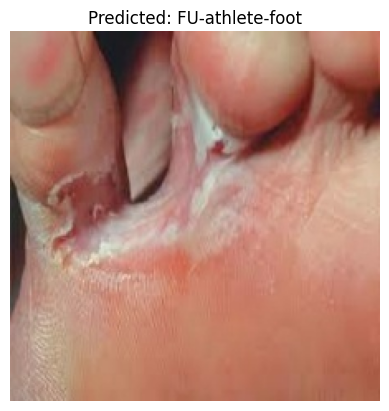

In [ ]:
import tensorflow as tf
import numpy as np
import os
import random
from tensorflow.keras.preprocessing.image import load_img, img_to_array
import matplotlib.pyplot as plt

# Load trained model
model = tf.keras.models.load_model('/content/drive/MyDrive/ml_project_updated/model.h5')

# Define the test dataset directory (Update this path)
test_dir = "/content/drive/MyDrive/ml_project_updated/test_set"  # Update with your actual path
class_names = ["FU-athlete-foot", "FU-hand-ringworm", "FU-jock-itch", "FU-nail-fungus", "FU-ringworm", "FU-scalp-ringworm"]

# Get all test image paths from subdirectories
all_test_images = []
for subdir in os.listdir(test_dir):
    subdir_path = os.path.join(test_dir, subdir)
    if os.path.isdir(subdir_path):
        for img_file in os.listdir(subdir_path):
            img_path = os.path.join(subdir_path, img_file)
            all_test_images.append(img_path)

# Check if images exist
if len(all_test_images) == 0:
    print("No test images found!")
else:
    # Select a random image
    test_image_path = random.choice(all_test_images)
    print("Testing image:", test_image_path)

    # Function to predict an image
    def predict_image(image_path, model, class_names):
        img = load_img(image_path, target_size=(150, 150))  # Resize based on your model input size
        img_array = img_to_array(img) / 255.0  # Normalize image to 0-1 range
        img_array = np.expand_dims(img_array, axis=0)  # Add batch dimension

        prediction = model.predict(img_array)
        predicted_class = class_names[np.argmax(prediction)]  # Get class with highest probability

        return predicted_class

    # Predict result
    result = predict_image(test_image_path, model, class_names)
    print(f"Predicted Infection Type: {result}")

    # Display image
    img = load_img(test_image_path)
    plt.imshow(img)
    plt.title(f"Predicted: {result}")
    plt.axis("off")  # Hide axis
    plt.show()


Saving images (10).jpeg to images (10).jpeg
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step


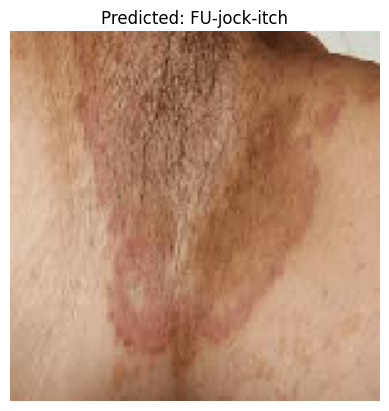

Prediction for the uploaded image: FU-jock-itch


In [ ]:
from google.colab import files
import numpy as np
from tensorflow.keras.preprocessing.image import load_img, img_to_array
import matplotlib.pyplot as plt

# Function to upload and predict a new image
def upload_and_predict(model, class_names):
    # Prompt user to upload an image
    uploaded = files.upload()  # This will prompt the user to upload a file

    for image_name in uploaded.keys():
        # Load and process the uploaded image
        img_path = image_name  # Get the file path of the uploaded image
        img = load_img(img_path, target_size=(150, 150))  # Resize to match model input
        img_array = img_to_array(img) / 255.0  # Convert to array and rescale
        img_array = np.expand_dims(img_array, axis=0)  # Expand dimensions to match model input shape

        # Make prediction
        prediction = model.predict(img_array)
        predicted_class = class_names[np.argmax(prediction)]  # Get the class with the highest probability

        # Display the image and prediction
        plt.imshow(img)
        plt.title(f"Predicted: {predicted_class}")
        plt.axis("off")
        plt.show()

        print(f"Prediction for the uploaded image: {predicted_class}")

# Call the function to upload and predict
upload_and_predict(model, class_names)
